AlexNet——参数太多，需要多训练几轮才能有比较好的结果

In [44]:
model = Sequential()

model.add(Conv2D(filters=96,kernel_size=11,strides=4, input_shape=(160,120, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=384,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 38, 28, 96)        34944     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 18, 13, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 18, 13, 256)       614656    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 8, 6, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 8, 6, 384)         885120    
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 6, 384)       

In [45]:
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
history1 = model.fit(train_images, train_labels, batch_size = 32, epochs = 30, validation_data=(val_images, val_labels))

Epoch 1/30
243/243 [==============================] - 97s 396ms/step - loss: 1.4016 - accuracy: 0.2638 - val_loss: 1.3802 - val_accuracy: 0.2845
Epoch 2/30
243/243 [==============================] - 94s 389ms/step - loss: 1.3194 - accuracy: 0.3467 - val_loss: 1.2588 - val_accuracy: 0.3873
Epoch 3/30
243/243 [==============================] - 94s 389ms/step - loss: 1.2084 - accuracy: 0.4255 - val_loss: 1.1454 - val_accuracy: 0.4851
Epoch 4/30
243/243 [==============================] - 94s 385ms/step - loss: 1.1278 - accuracy: 0.4798 - val_loss: 1.0736 - val_accuracy: 0.5113
Epoch 5/30
243/243 [==============================] - 92s 380ms/step - loss: 1.0531 - accuracy: 0.5208 - val_loss: 1.0506 - val_accuracy: 0.5417
Epoch 6/30
243/243 [==============================] - 91s 373ms/step - loss: 0.9848 - accuracy: 0.5646 - val_loss: 1.0038 - val_accuracy: 0.5622
Epoch 7/30
243/243 [==============================] - 91s 376ms/step - loss: 0.8949 - accuracy: 0.6070 - val_loss: 1.0031 - val_ac

In [54]:
score = model.evaluate(test_images,test_labels)
print(score)

76/76 [==============================] - 6s 81ms/step - loss: 3.1344 - accuracy: 0.4481
[3.134385585784912, 0.4480626583099365]


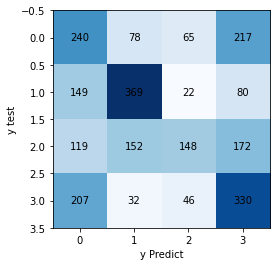

In [60]:
from sklearn.metrics import confusion_matrix
pred = np.argmax(model.predict(test_images),axis=1)
cm = confusion_matrix(test_labels, pred)
# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y test")
plt.grid(False)
plt.show()

Resnet50

In [46]:
# Using Resnet
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(160,120,3))
restnet.summary()

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model2 = Sequential()
model2.add(restnet)
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))



Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 126, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 60, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 80, 60, 64)   256         ['conv1_conv[0][0]']      

In [47]:
model2.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
history2 = model2.fit(train_images, train_labels, batch_size = 32, epochs = 15, validation_data=(val_images, val_labels))

Epoch 1/15
243/243 [==============================] - 1054s 4s/step - loss: 0.9160 - accuracy: 0.7311 - val_loss: 4.8317 - val_accuracy: 0.3380
Epoch 2/15
243/243 [==============================] - 1053s 4s/step - loss: 0.3494 - accuracy: 0.8787 - val_loss: 1.3807 - val_accuracy: 0.3014
Epoch 3/15
243/243 [==============================] - 1045s 4s/step - loss: 0.2798 - accuracy: 0.9038 - val_loss: 5.4994 - val_accuracy: 0.2551
Epoch 4/15
243/243 [==============================] - 1040s 4s/step - loss: 0.4889 - accuracy: 0.8552 - val_loss: 7.8117 - val_accuracy: 0.3328
Epoch 5/15
243/243 [==============================] - 1037s 4s/step - loss: 0.4598 - accuracy: 0.8660 - val_loss: 654.2601 - val_accuracy: 0.2361
Epoch 6/15
243/243 [==============================] - 1042s 4s/step - loss: 0.2337 - accuracy: 0.9228 - val_loss: 1.1224 - val_accuracy: 0.7762
Epoch 7/15
243/243 [==============================] - 1038s 4s/step - loss: 0.1956 - accuracy: 0.9299 - val_loss: 20.3226 - val_accura

In [48]:
score2 = model2.evaluate(test_images,test_labels)
print(score2)

76/76 [==============================] - 69s 913ms/step - loss: 0.4778 - accuracy: 0.8516
[0.4778290390968323, 0.8516075611114502]


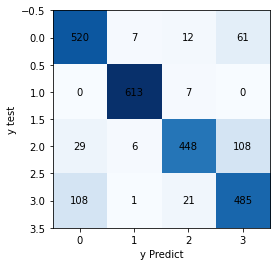

In [59]:
from sklearn.metrics import confusion_matrix
pred2 = np.argmax(model2.predict(test_images),axis=1)
cm2 = confusion_matrix(test_labels, pred2)
# Plot confusion matrix
plt.imshow(cm2,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm2):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y test")
plt.grid(False)
plt.show()

AlexNet_tiny

In [61]:
model3 = Sequential()

model3.add(Conv2D(filters=48,kernel_size=5, input_shape=(160,120, 3),activation='relu'))
model3.add(MaxPooling2D(pool_size=3))
model3.add(Conv2D(filters=128,kernel_size=5,padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=3))
model3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=3))
model3.add(Flatten())
model3.add(Dense(1024,activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(4,activation='softmax'))

model3.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 156, 116, 48)      3648      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 52, 38, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 52, 38, 128)       153728    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 17, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 17, 12, 64)        73792     
                                                                 
 conv2d_52 (Conv2D)          (None, 17, 12, 128)     

In [64]:
model3.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
history3 = model3.fit(train_images, train_labels, batch_size = 32, epochs = 30, validation_data=(val_images, val_labels))

Epoch 1/30
243/243 [==============================] - 161s 660ms/step - loss: 0.6975 - accuracy: 0.6811 - val_loss: 0.5357 - val_accuracy: 0.7495
Epoch 2/30
243/243 [==============================] - 188s 772ms/step - loss: 0.5102 - accuracy: 0.7753 - val_loss: 0.5127 - val_accuracy: 0.7865
Epoch 3/30
243/243 [==============================] - 184s 759ms/step - loss: 0.4211 - accuracy: 0.8143 - val_loss: 0.3988 - val_accuracy: 0.8277
Epoch 4/30
243/243 [==============================] - 182s 747ms/step - loss: 0.3514 - accuracy: 0.8521 - val_loss: 0.3245 - val_accuracy: 0.8627
Epoch 5/30
243/243 [==============================] - 181s 746ms/step - loss: 0.2774 - accuracy: 0.8846 - val_loss: 0.2633 - val_accuracy: 0.8873
Epoch 6/30
243/243 [==============================] - 181s 747ms/step - loss: 0.2445 - accuracy: 0.8994 - val_loss: 0.3244 - val_accuracy: 0.8750
Epoch 7/30
243/243 [==============================] - 182s 748ms/step - loss: 0.2017 - accuracy: 0.9205 - val_loss: 0.2117 -

In [65]:
score3 = model3.evaluate(test_images,test_labels)
print(score3)

76/76 [==============================] - 16s 210ms/step - loss: 1.7880 - accuracy: 0.7378
[1.78795325756073, 0.7378400564193726]


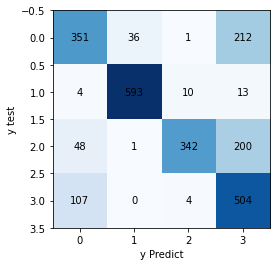

In [68]:
pred3 = np.argmax(model3.predict(test_images),axis=1)
cm3 = confusion_matrix(test_labels, pred3)
# Plot confusion matrix
plt.imshow(cm3,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm3):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y test")
plt.grid(False)
plt.show()

In [75]:
score3 = model3.evaluate(test_images,test_labels)
print(score3)

76/76 [==============================] - 16s 208ms/step - loss: 3.1291 - accuracy: 0.7679
[3.1290760040283203, 0.7679307460784912]


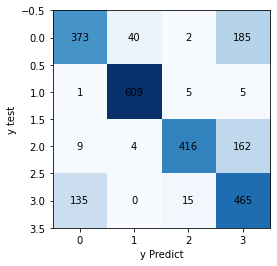

In [76]:
pred3 = np.argmax(model3.predict(test_images),axis=1)
cm3 = confusion_matrix(test_labels, pred3)
# Plot confusion matrix
plt.imshow(cm3,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm3):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y test")
plt.grid(False)
plt.show()

CNN

In [79]:
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), input_shape=(160,120, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model4.add(Dropout(0.05))

model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model4.add(Dropout(0.05))

model4.add(Conv2D(48, (3, 3),activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model4.add(Dropout(0.2))

model4.add(Conv2D(48, (4, 4), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model4.add(Dropout(0.2))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(4, activation="softmax"))
model4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 158, 118, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 79, 59, 32)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 79, 59, 32)        0         
                                                                 
 conv2d_63 (Conv2D)          (None, 77, 57, 32)        9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 38, 28, 32)       0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 38, 28, 32)      

In [81]:
model4.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
history4 = model4.fit(train_images, train_labels, batch_size = 32, epochs = 20, validation_data=(val_images, val_labels))

Epoch 1/20
243/243 [==============================] - 84s 345ms/step - loss: 1.0146 - accuracy: 0.5392 - val_loss: 0.8087 - val_accuracy: 0.6517
Epoch 2/20
243/243 [==============================] - 68s 282ms/step - loss: 0.7483 - accuracy: 0.6753 - val_loss: 0.5951 - val_accuracy: 0.7315
Epoch 3/20
243/243 [==============================] - 52s 212ms/step - loss: 0.5895 - accuracy: 0.7432 - val_loss: 0.4625 - val_accuracy: 0.8200
Epoch 4/20
243/243 [==============================] - 56s 231ms/step - loss: 0.4981 - accuracy: 0.7914 - val_loss: 0.4322 - val_accuracy: 0.8205
Epoch 5/20
243/243 [==============================] - 54s 220ms/step - loss: 0.4162 - accuracy: 0.8297 - val_loss: 0.3481 - val_accuracy: 0.8627
Epoch 6/20
243/243 [==============================] - 52s 213ms/step - loss: 0.3626 - accuracy: 0.8561 - val_loss: 0.2944 - val_accuracy: 0.8771
Epoch 7/20
243/243 [==============================] - 51s 209ms/step - loss: 0.3089 - accuracy: 0.8768 - val_loss: 0.2741 - val_ac

In [82]:
score4 = model4.evaluate(test_images,test_labels)
print(score4)

76/76 [==============================] - 3s 39ms/step - loss: 0.8383 - accuracy: 0.7807
[0.8383027911186218, 0.7807089686393738]


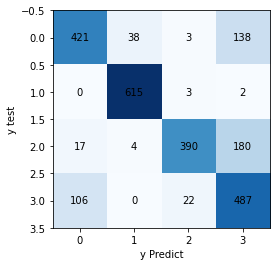

In [85]:
pred4 = np.argmax(model4.predict(test_images),axis=1)
cm4 = confusion_matrix(test_labels, pred4)
# Plot confusion matrix
plt.imshow(cm4,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm4):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y test")
plt.grid(False)
plt.show()

ResNet101

In [ ]:
# Using Resnet
import keras
from tensorflow.keras.applications.resnet import ResNet101
from keras.models import Model

restnet = ResNet101(include_top=False, weights='imagenet', input_shape=(60,80,3))
restnet.summary()

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model2 = Sequential()
model2.add(restnet)
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))

